# Lab6 CNNs

## Team member 
Xiaoqing Zou, Jonathan Mejia, Rongwei Ji

## Data introduction 
Data source: https://www.kaggle.com/datasets/yousefmohamed20/oxford-102-flower-dataset


## 1.Preparation 
###  1.1  (1.5) Choose and explain what metric(s) you will use to evaluate your algorithm’s performance

We opt for the Confusion Matrix to assess the model algorithm. With multiple classes or follower categories, this metric enables us to discern which classes are effectively identified. It aids in recognizing areas where the model may encounter confusion between different classes, shedding light on its performance.

The Confusion Matrix highlights instances where the CNN misclassifies follower types. By identifying patterns of confusion between different types, we can uncover potential weaknesses in the model's feature extraction or classification process, guiding adjustments to enhance accuracy.


### 1.2 (1.5)Method Dividing  data 
The originla data already divid into the train and test. Let's check them how they distribute.

train image amount: [27, 38, 35, 49, 36, 68, 73, 38, 44, 38, 36, 60, 65, 38, 49, 46, 34, 47, 72, 35, 34, 33, 36, 55, 62, 36, 61, 48, 36, 31, 28, 33, 62, 92, 44, 33, 44, 54, 97, 49, 100, 73, 33, 157, 61, 57, 38, 54, 73, 206, 67, 70, 47, 56, 92, 50, 86, 56, 35, 85, 36, 48, 42, 42, 88, 51, 36, 43, 46, 33, 51, 64, 77, 147, 142, 95, 83, 205, 112, 34, 70, 82, 135, 82, 104, 66, 48, 48, 51, 116, 153, 41, 66, 59, 53, 34, 132, 101, 72, 54, 68, 50]
test image amount: [5, 3, 8, 4, 6, 9, 9, 6, 3, 4, 3, 9, 6, 7, 5, 3, 2, 4, 7, 2, 5, 5, 3, 6, 9, 2, 14, 2, 6, 8, 5, 6, 7, 8, 8, 5, 6, 8, 14, 4, 16, 11, 3, 21, 3, 5, 3, 4, 8, 24, 8, 14, 4, 7, 8, 11, 14, 7, 9, 10, 8, 4, 4, 5, 7, 4, 4, 3, 3, 6, 4, 9, 11, 28, 14, 13, 4, 25, 14, 3, 10, 11, 13, 17, 14, 10, 10, 5, 6, 13, 15, 2, 14, 8, 11, 6, 16, 14, 9, 5, 4, 7]


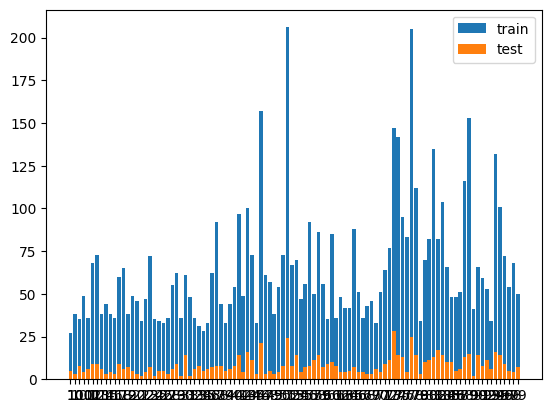

In [64]:
# check the 102 flowers dataset and how the image amount in different categre in train folder and test folder
import os
import shutil
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split

# check the image amount in different categre in train folder and test folder

def check_image_amount():
    train_dir = './102 flower/flowers/train'
    test_dir = './102 flower/flowers/test'
    train_categories = os.listdir(train_dir)
    test_categories = os.listdir(test_dir)
    train_categories.sort()
    test_categories.sort()
    train_image_amount = []
    test_image_amount = []
    for category in train_categories:
        train_image_amount.append(len(os.listdir(os.path.join(train_dir, category))))
    for category in test_categories:
        test_image_amount.append(len(os.listdir(os.path.join(test_dir, category))))
    print('train image amount:', train_image_amount)
    print('test image amount:', test_image_amount)
    plt.bar(train_categories, train_image_amount, label='train')
    plt.bar(test_categories, test_image_amount, label='test')
    plt.legend()
    plt.show()

check_image_amount()

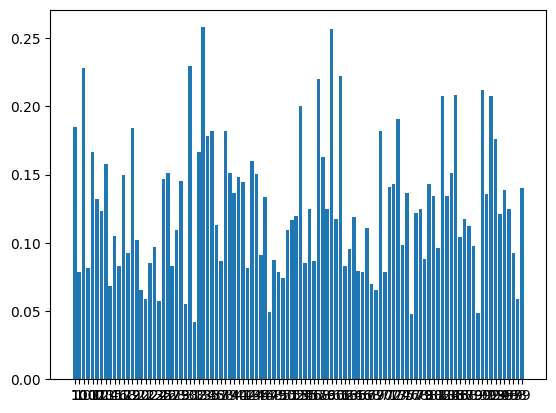

In [65]:
# show the rate of the train and test image amount in different categre

def show_rate():
    train_dir = './102 flower/flowers/train'
    test_dir = './102 flower/flowers/test'
    train_categories = os.listdir(train_dir)
    test_categories = os.listdir(test_dir)
    train_categories.sort()
    test_categories.sort()
    train_image_amount = []
    test_image_amount = []
    for category in train_categories:
        train_image_amount.append(len(os.listdir(os.path.join(train_dir, category))))
    for category in test_categories:
        test_image_amount.append(len(os.listdir(os.path.join(test_dir, category))))
    train_image_amount = np.array(train_image_amount)
    test_image_amount = np.array(test_image_amount)
    rate = test_image_amount / train_image_amount
    plt.bar(train_categories, rate)
    plt.show()

show_rate()

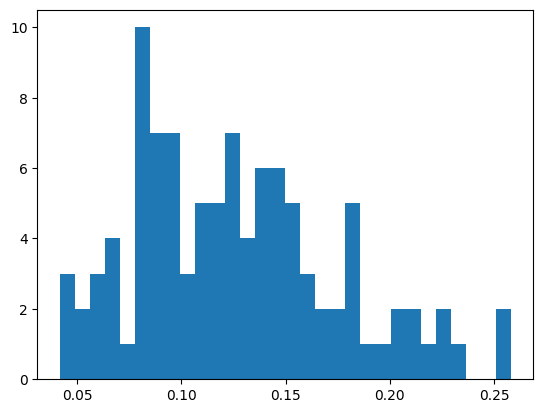

In [70]:
# show the rate distribution of the train and test image amount in different categre

def show_rate_distribution():
    train_dir = './102 flower/flowers/train'
    test_dir = './102 flower/flowers/test'
    train_categories = os.listdir(train_dir)
    test_categories = os.listdir(test_dir)
    train_categories.sort()
    test_categories.sort()
    train_image_amount = []
    test_image_amount = []
    for category in train_categories:
        train_image_amount.append(len(os.listdir(os.path.join(train_dir, category))))
    for category in test_categories:
        test_image_amount.append(len(os.listdir(os.path.join(test_dir, category))))
    train_image_amount = np.array(train_image_amount)
    test_image_amount = np.array(test_image_amount)
    rate = test_image_amount / train_image_amount
    plt.hist(rate, bins=30)
    plt.show()

show_rate_distribution()

Based on the analysis above, the dataset is totaly imbalanced, we decide use ShuffleSplit to do the divding the data. Due to the some categries has the few data and some may have more, shufflesplit would be suitable for this situation. 

When working with limited computational resources or time constraints, ShuffleSplit can be more efficient than stratified 10-fold cross-validation.

In the case of small categories with few images, ShuffleSplit can be particularly useful. By generating random splits, ShuffleSplit provides the opportunity for samples from small categories to appear in both the training and test sets, which can help prevent the exclusion of these categories from the evaluation process.



# 2 Modeling

2.1 data augmentation

In [67]:
    # training to use data expansion in Keras
    # data expansion techniques 
    # Keras augmentation layers


In [57]:
import tensorflow as tf


import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape, Input
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import RandomFlip, RandomRotation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import average 
from tensorflow.keras.models import  Model


# keras version


In [74]:
# SKip it 


#  recombine all the test and train data into one data set and build model , combine all the data into the newflower folder

import time;
import os
import shutil
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

start_time=time.time()


def combine_data():
    train_dir = './102 flower/flowers/train'
    test_dir = './102 flower/flowers/test'
    new_dir = './102 flower/flowers/newflower'
    if not os.path.exists(new_dir):
        os.makedirs(new_dir)
    for category in os.listdir(train_dir):
        if not os.path.exists(os.path.join(new_dir, category)):
            os.makedirs(os.path.join(new_dir, category))
        for image in os.listdir(os.path.join(train_dir, category)):
            shutil.copy(os.path.join(train_dir, category, image), os.path.join(new_dir, category, image))
    for category in os.listdir(test_dir):
        if not os.path.exists(os.path.join(new_dir, category)):
            os.makedirs(os.path.join(new_dir, category))
        for image in os.listdir(os.path.join(test_dir, category)):
            shutil.copy(os.path.join(test_dir, category, image), os.path.join(new_dir, category, image))

# already combine no need run it again
#combine_data()

end_time=time.time()
print('time cost',end_time-start_time,'s')

time cost 0.0005068778991699219 s


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import time 

# 2 m toad the original photo to mamnery 
statt=time.time()

# get the data to X y from the  newflower folder
def get_data():
    new_dir = './102 flower/flowers/newflower'
    X = []
    y = []
    for category in os.listdir(new_dir):
        for image in os.listdir(os.path.join(new_dir, category)):
            img = Image.open(os.path.join(new_dir, category, image))
            img = img.resize((128, 128))
            img = np.array(img) / 255.0
            X.append(img)
            y.append(category)
    X = np.array(X)
    y = np.array(y)
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)
    y = keras.utils.to_categorical(y, 102)
    return X, y

X, y = get_data()
endt=time.time()
print('time cost',endt-statt,'s')
print(X.shape)



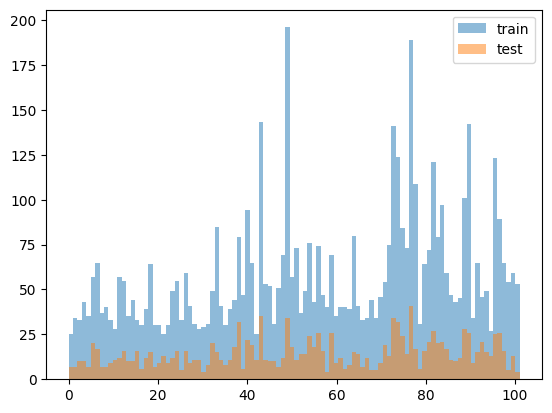

In [77]:
# shuffle the data and split the data into train and test data 
def split_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

# not only onetime , just multiple time to run it

# onetime
# load the data and split the data into train and test data

X_train, X_test, y_train, y_test = split_data(X, y)

# plot the plot bewteen the xtran and xtest data
plt.hist(y_train.argmax(axis=1), bins=102, alpha=0.5, label='train')
plt.hist(y_test.argmax(axis=1), bins=102, alpha=0.5, label='test')
plt.legend()
plt.show()



In [ ]:
# summry
# this summray starts fow woain

# from sklearn import metrics as mt
# from matplotlib import pyplot as plt
# from skimage.io import imshow
# import seaborn as sns
# %matplotlib inline

# # TODO - labels =
# #labels = 
# def summarize_net(net, X_test, y_test, title_text=''):
#     plt.figure(figsize=(15,5))
#     yhat = np.argmax(net.predict(X_test), axis=1)
#     acc = mt.accuracy_score(y_test,yhat)
#     cm = mt.confusion_matrix(y_test,yhat)
#     cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
#     sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=labels,yticklabels=labels)
#     plt.title(title_text+'{:.4f}'.format(acc))
    


In [79]:
# originael model's image size is 224*224 / 
# and bingxie zhaodao zuide 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# use the kaeras to load the image and resize the image to 80*80
# using the ImageDataGenerator to load the image and resize the image to 80*80
# Keras augmentation layers,  
datagen = ImageDataGenerator(
    rotation_range=1,
    width_shift_range=0.05,
    height_shift_range=0.05)

# original X and y is path collection 

# please use the ImageDataGenerator and flow_from_directory to load the image and resize the image to 80*80 to the X and y

# Compute statistics on the data
datagen.fit(X)
datagen.fit(X_train)

# after fit the X and y , it could geenerat the folder into the new folder named fitedflower and save all the fitted new photo there
# save the fitted photo into the fitedflower folder
def save_fitted_data():
    fitted_dir = './102 flower/flowers/fittedflower'
    if not os.path.exists(fitted_dir):
        os.makedirs(fitted_dir)
    for category in os.listdir('./102 flower/flowers/newflower'):
        if not os.path.exists(os.path.join(fitted_dir, category)):
            os.makedirs(os.path.join(fitted_dir, category))
    for category in os.listdir('./102 flower/flowers/newflower'):
        for image in os.listdir(os.path.join('./102 flower/flowers/newflower', category)):
            img = Image.open(os.path.join('./102 flower/flowers/newflower', category, image))
            img = img.resize((80, 80))
            img.save(os.path.join(fitted_dir, category, image))

# only for first 
save_fitted_data()
# 1m52s


## Data expansion techniques

# image sizde   ImageDataGenerator.

# Keras augmentation layers


we use the     rotation_range=1,  width_shift_range=0.05,    height_shift_range=0.05

In [84]:
# getthe one fited file's shape 

from sklearn.model_selection import StratifiedKFold
from tensorflow import keras
from tensorflow.keras import layers

loss = 'categorical_crossentropy'  # Use categorical cross-entropy for multi-class classification
optimizer = 'rmsprop'
metrics = [keras.metrics.Precision(), keras.metrics.Recall()]
batch_size = 128
epochs = 3
verbose = 1
n_splits = 2
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=1234)
scores = []



 #  convolutional neural network

In [81]:
#  two different convolutional network architectures and investigate changing one or more parameters of each architecture such as the number of filters



def build_basic_model(l2_lambda, metrics):
    reg = l2(l2_lambda)
    cnn = Sequential()

    cnn.add(Conv2D(filters=32,
                kernel_size=(3,3),
                kernel_regularizer=reg,
                padding='same',
                activation='relu'))
    cnn.add(Conv2D(filters=32,
                kernel_size=(3,3),
                kernel_regularizer=reg,
                padding='same',
                activation='relu'))
    cnn.add(MaxPooling2D(pool_size=(2, 2)))

    cnn.add(Conv2D(filters=64,
                kernel_size=(3,3),
                kernel_regularizer=reg,
                padding='same',
                activation='relu'))
    cnn.add(Conv2D(filters=64,
                kernel_size=(3,3),
                kernel_regularizer=reg,
                padding='same',
                activation='relu'))
    cnn.add(MaxPooling2D(pool_size=(2, 2)))

    cnn.add(Dropout(0.25))
    cnn.add(Flatten())
    cnn.add(Dense(128, activation='relu',
                kernel_regularizer=reg))
    cnn.add(Dropout(0.5))
    cnn.add(Dense(1, activation='sigmoid',
                kernel_regularizer=reg))

    cnn.compile(loss=loss,
                optimizer=optimizer,
                metrics=metrics)
    
    return cnn

In [82]:


def basic_model(l2_lambda, metrics):
    print("Basic Architecture")
    print("L2 Lambda:", l2_lambda,'\n')

    fold_no = 0
    histories = []
    eval_scores = []
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        cnn = build_basic_model(l2_lambda, metrics)

        print('Fold',fold_no)
        print('')
        
        history = cnn.fit(datagen.flow(X_train, y_train, batch_size=batch_size), 
                    steps_per_epoch=int(len(X_train)/batch_size),
                    epochs=epochs, verbose=verbose)

        print('')
        scores = cnn.evaluate(X_test, y_test, verbose=verbose)
        print('-' * 110)

        histories.append(history)
        eval_scores.append(scores)

        fold_no += 1

    eval_scores = np.array(eval_scores)
    print("Average Performance")
    print(f"Precision:  {round(np.mean(eval_scores[:,1]), 5)}")
    print(f"Recall:     {round(np.mean(eval_scores[:,2]), 5)}")
    
    return histories, eval_scores

#  